In [1]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

In [3]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [ ]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [5]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2024-10-22 00:00:00+00:00,67361.406250,31808472566,2620.197510,15541911074,0.999388,58886789137,593.360657,1739710555
2024-10-23 00:00:00+00:00,66432.195312,32263980353,2509.098877,17876984551,0.999194,60689585382,582.473389,1719055847
2024-10-24 00:00:00+00:00,68161.054688,31414428647,2534.498535,16128627601,0.999507,57614263583,594.154785,1595144217
2024-10-25 00:00:00+00:00,66642.414062,41469984306,2435.934082,22560233078,0.998163,78091841017,574.253601,1712373877
2024-10-26 00:00:00+00:00,66932.429688,33806940160,2472.196289,20027834368,0.998722,68965515264,582.907166,1682919040


In [ ]:
data.shape

(1828, 8)

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03
mean,33309.179315,3.163276e+10,1867.075558,1.577389e+10,1.000584,5.476045e+10,283.553345,1.347502e+09
std,18830.115955,1.777535e+10,1162.950087,9.744446e+09,0.002382,3.246421e+10,191.162774,1.394010e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.365992e+08
25%,17905.444824,2.017709e+10,1127.652985,9.053022e+09,0.999970,3.276665e+10,43.091956,4.193737e+08
50%,29907.703125,2.870287e+10,1822.735718,1.394887e+10,1.000213,4.829675e+10,290.565079,9.349870e+08
75%,47152.071289,3.865728e+10,2684.114319,1.954981e+10,1.000642,6.740312e+10,408.832649,1.800142e+09
max,73083.500000,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,710.464050,1.798295e+10


#Exploratory Data Analysis

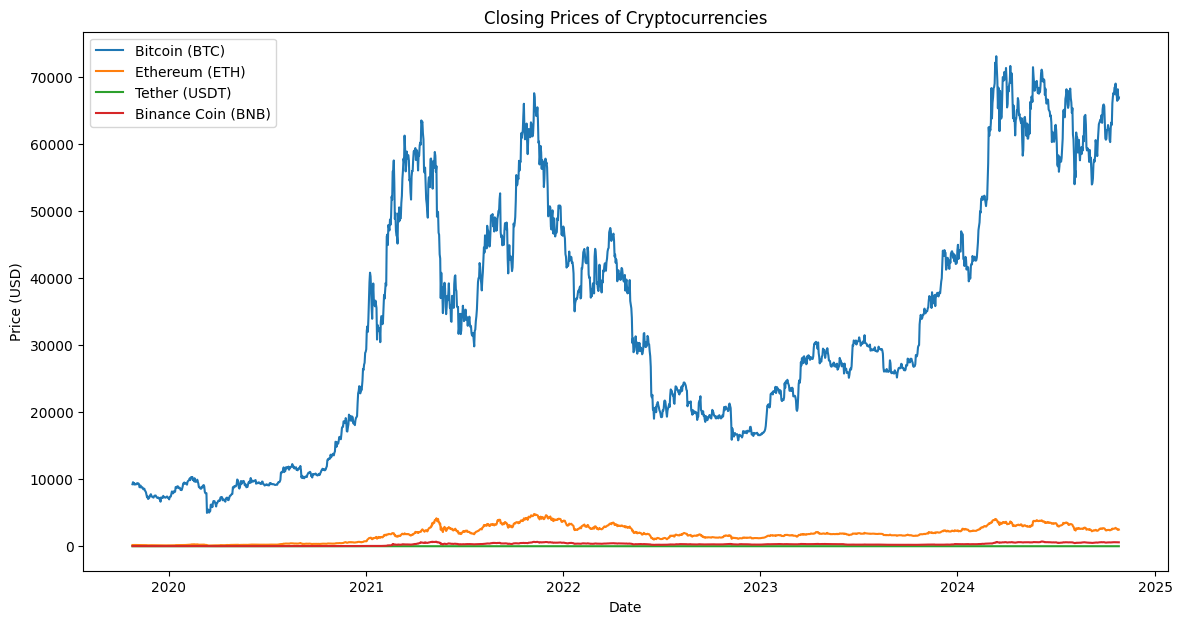

In [ ]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

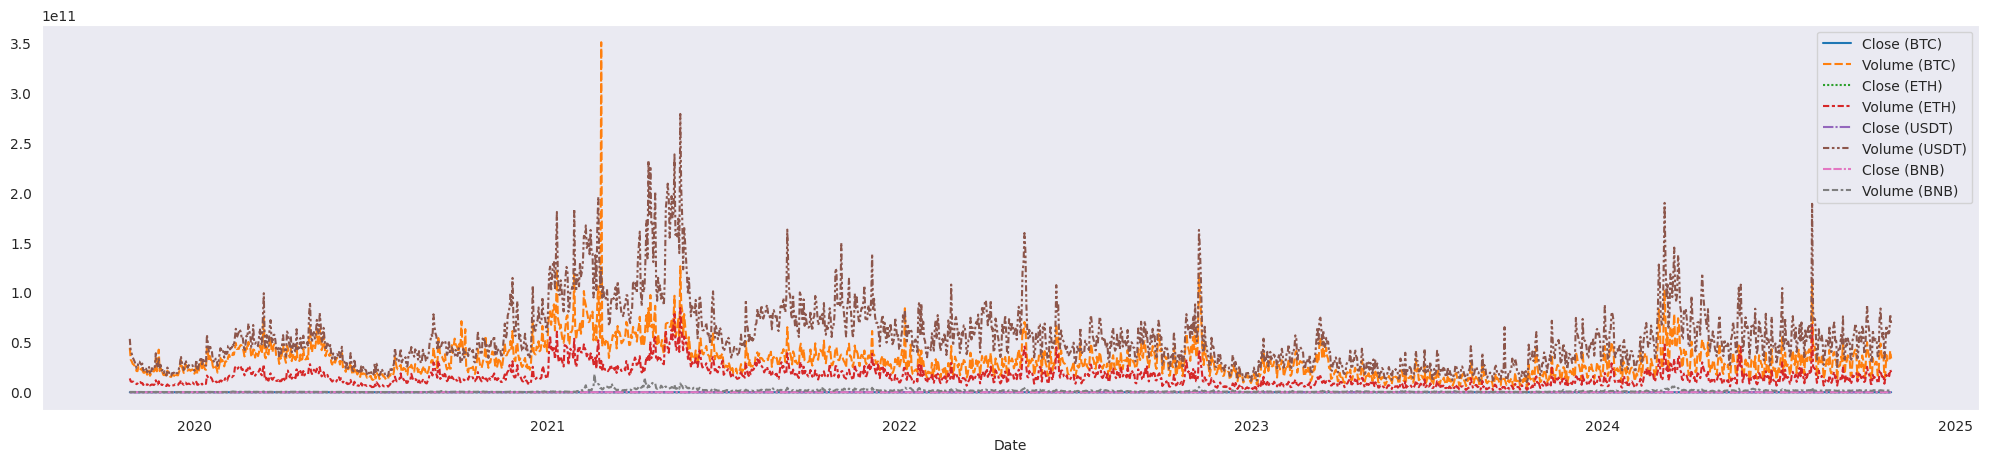

In [ ]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

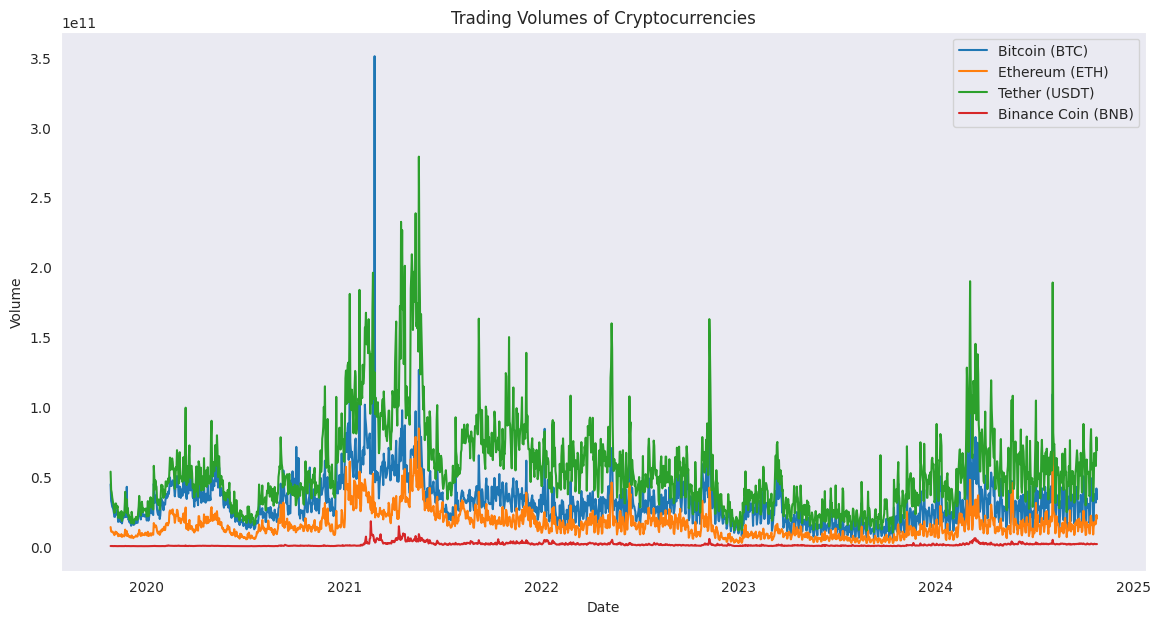

In [ ]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()



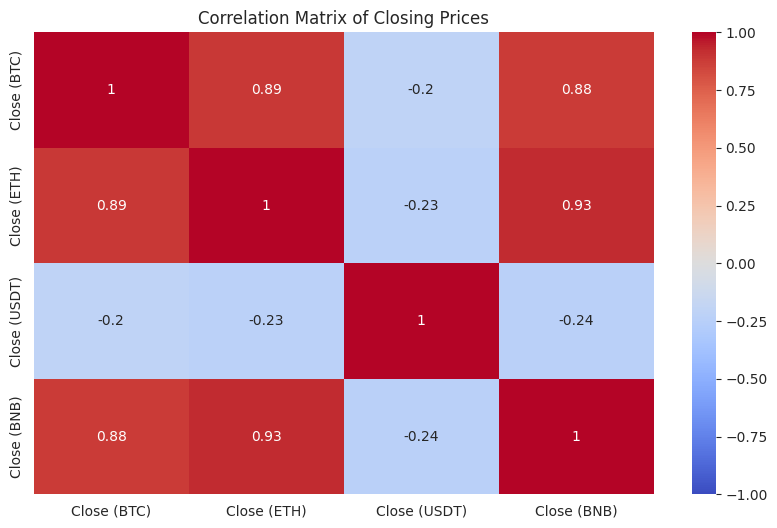

In [ ]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


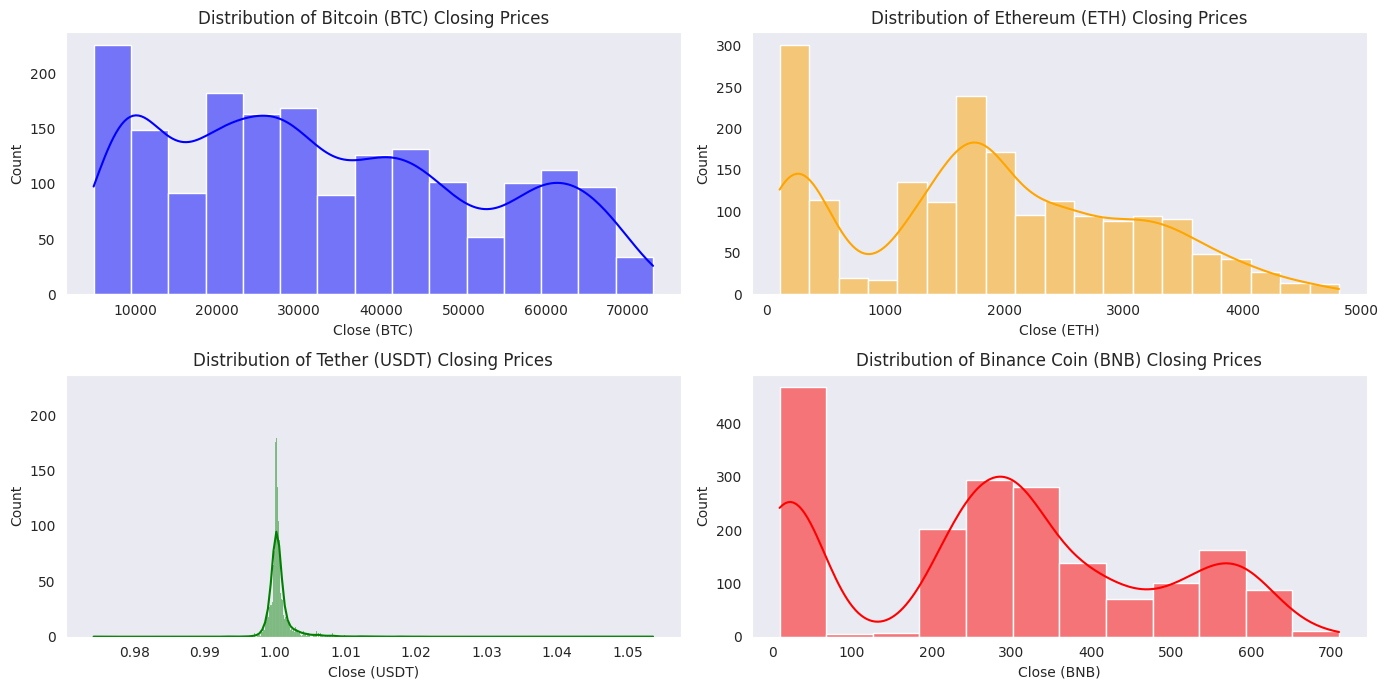

In [ ]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

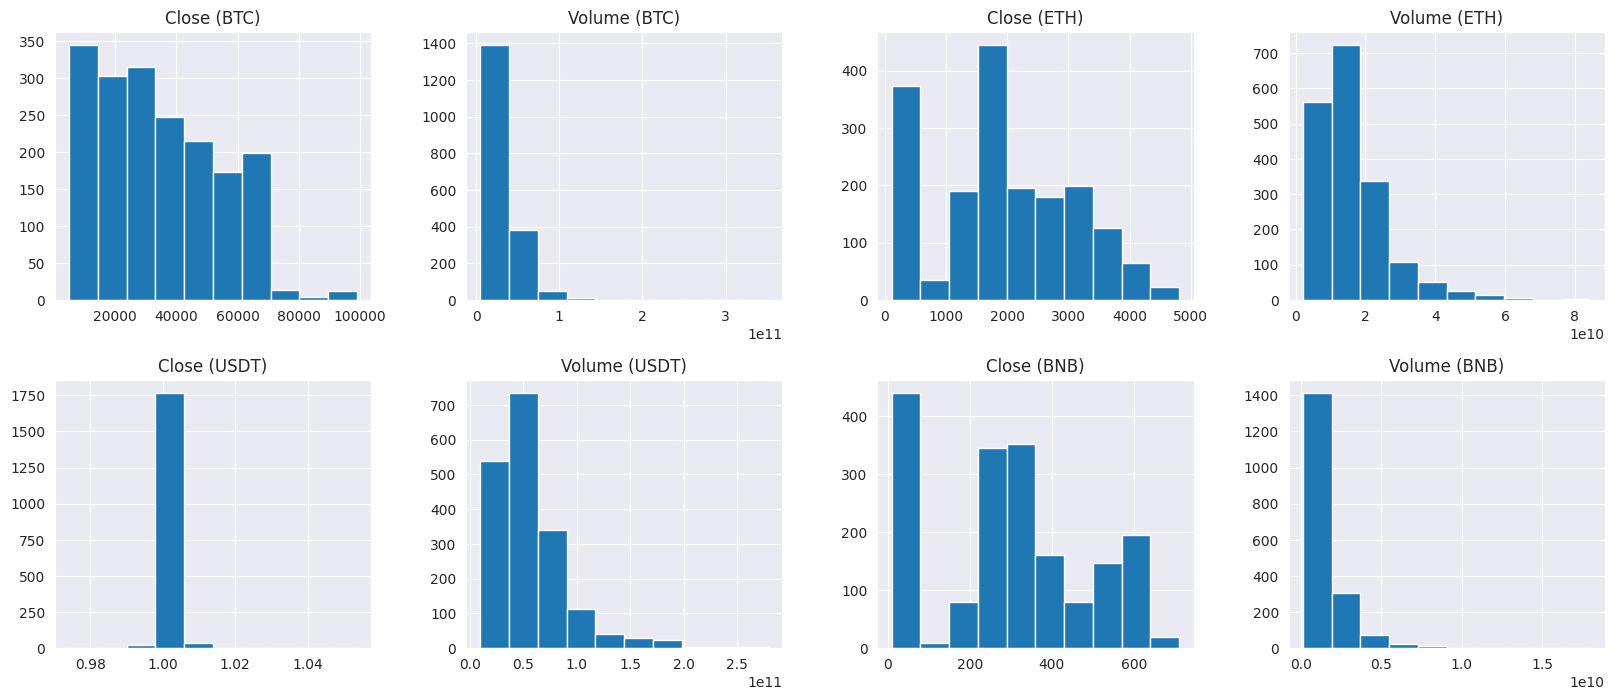

In [ ]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

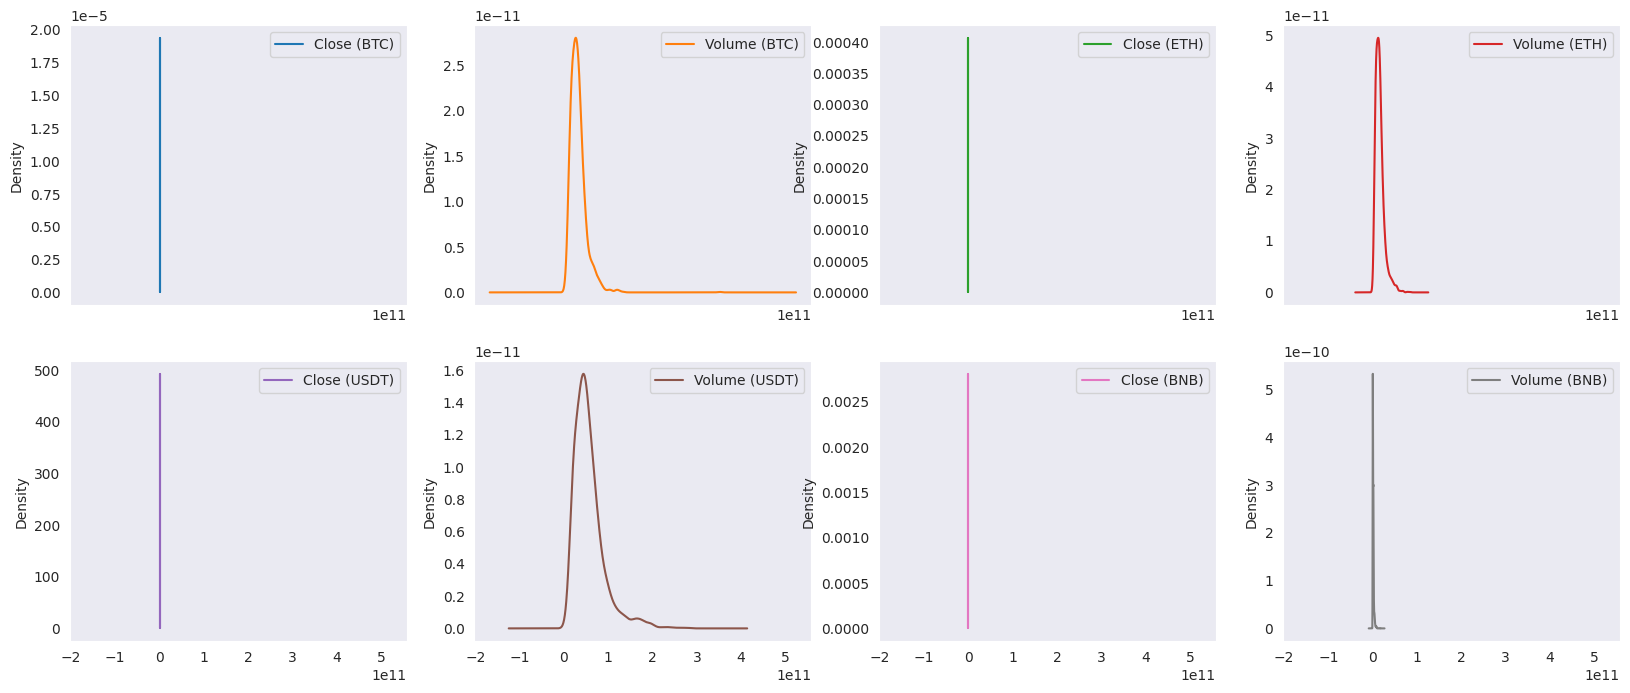

In [ ]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

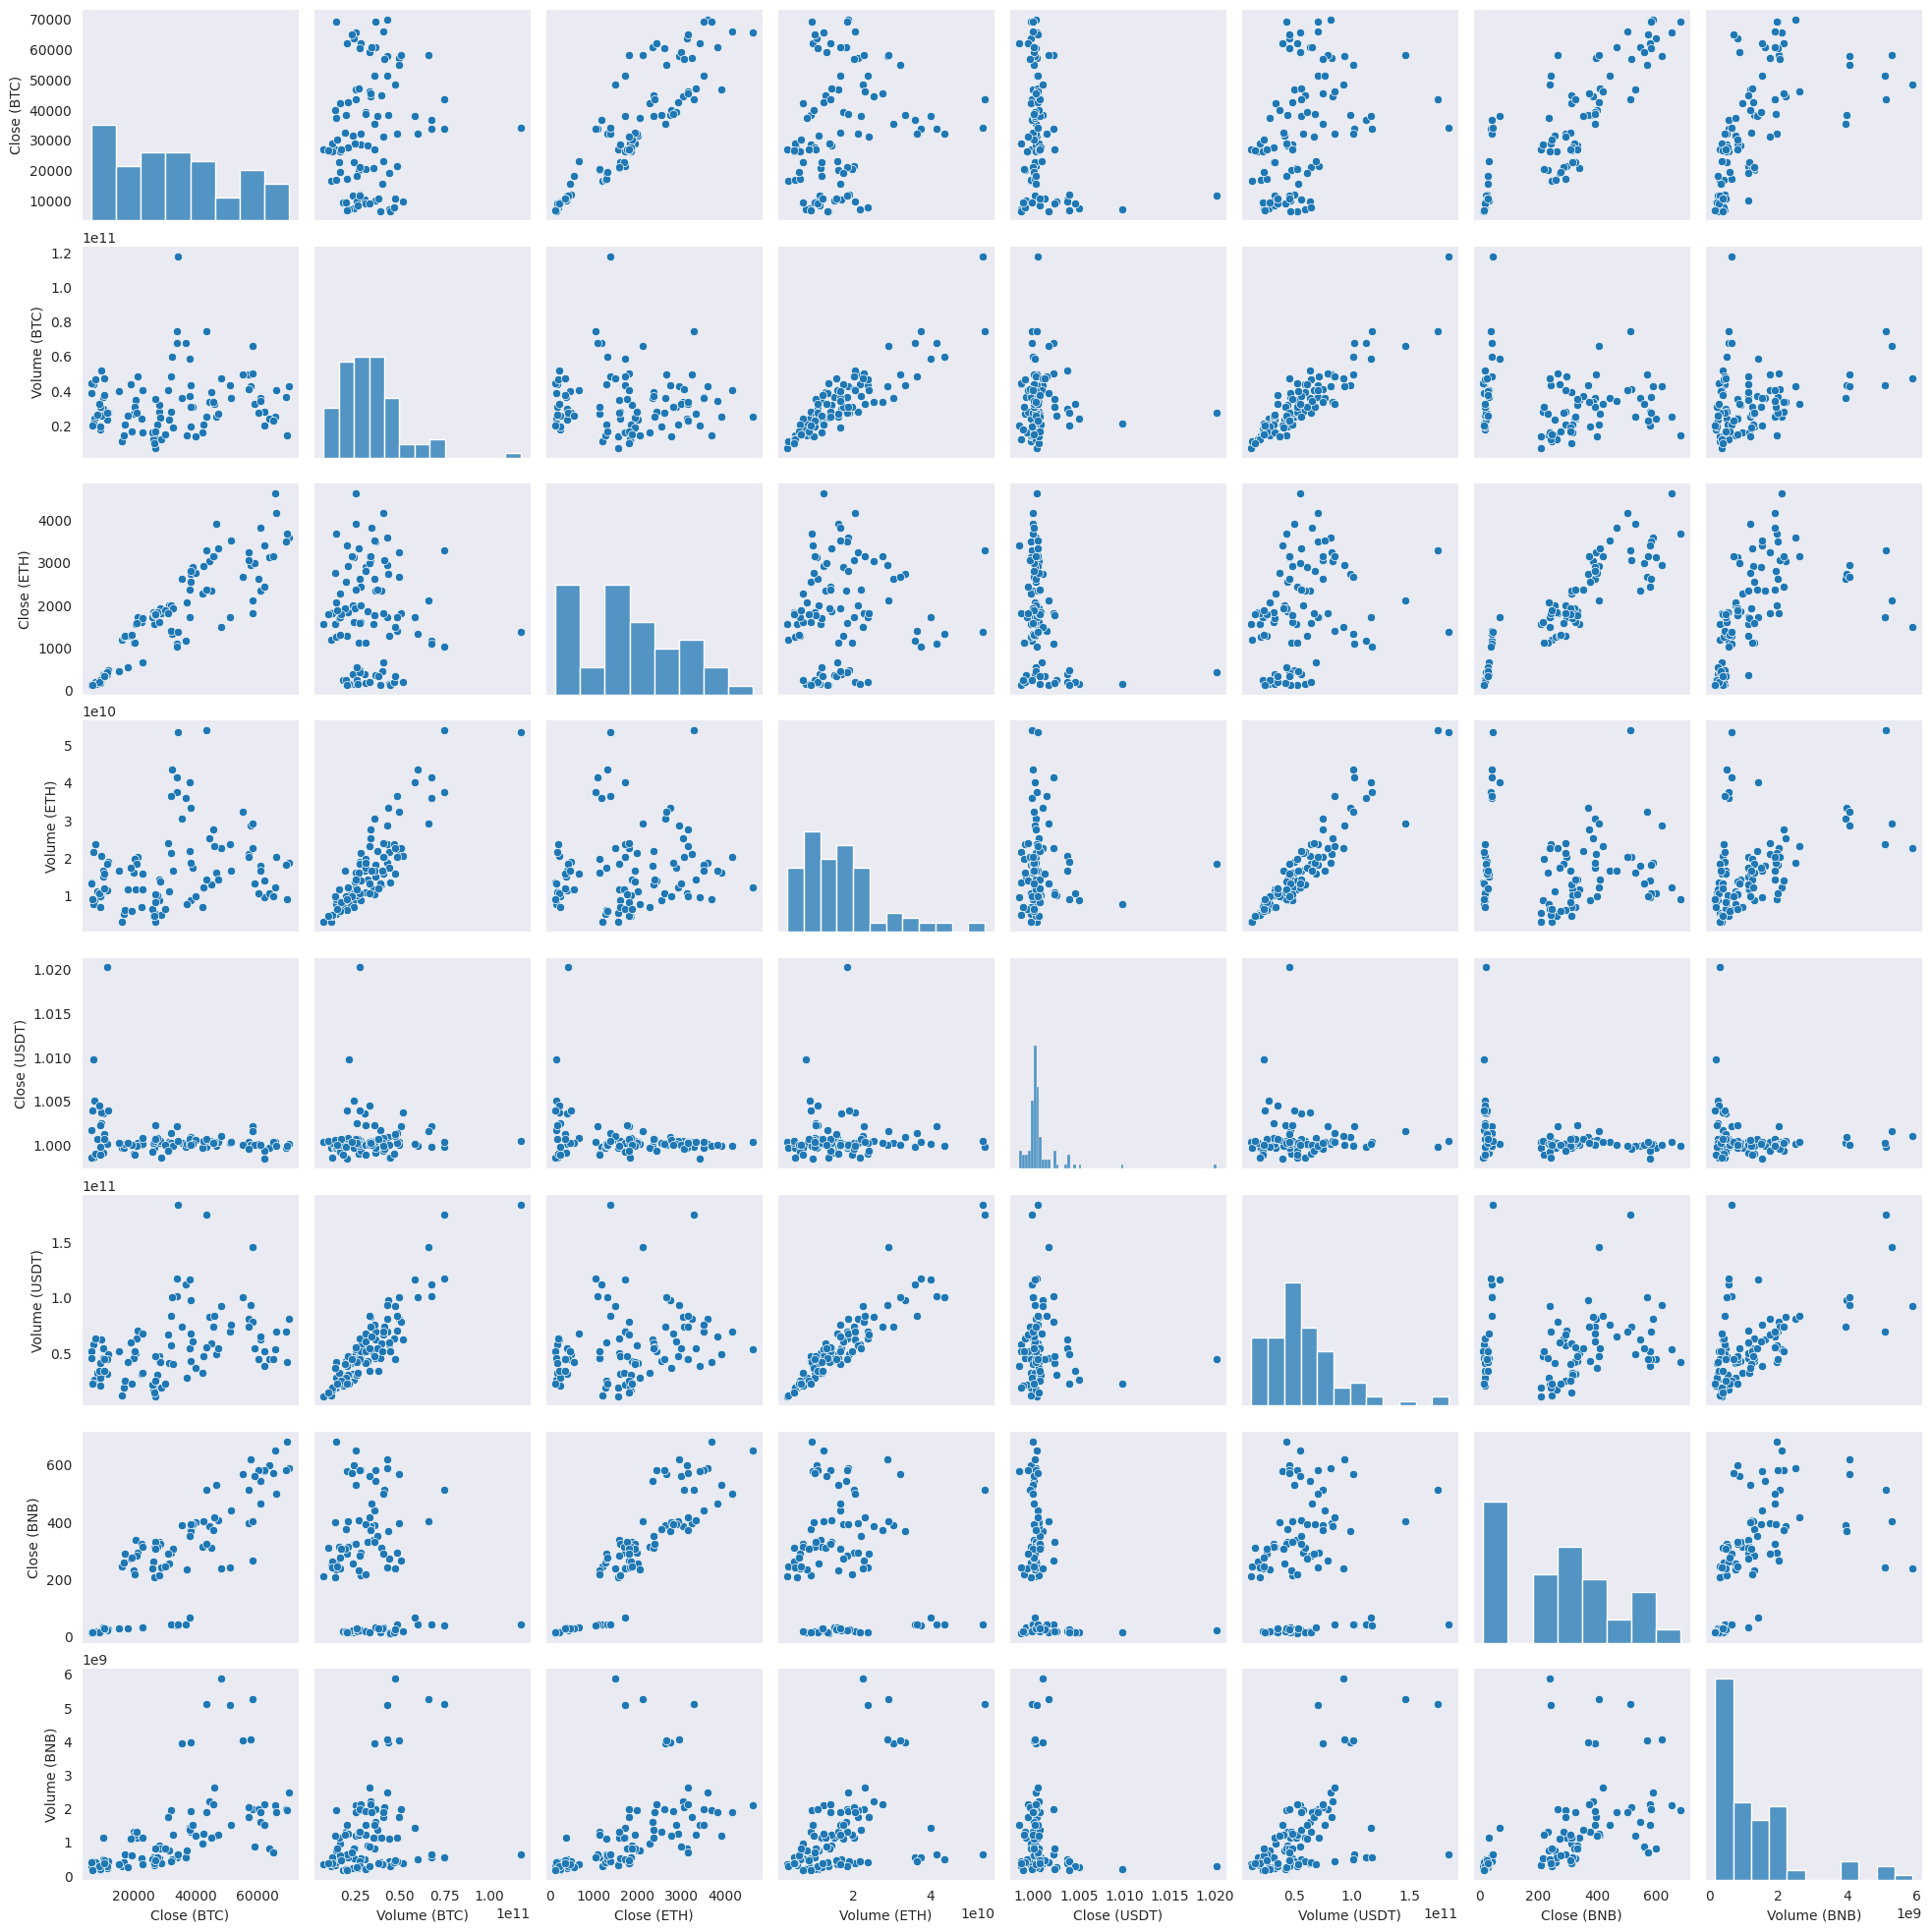

In [ ]:
sns.pairplot(data.sample(n=100));


#Data Pre-processing

In [ ]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [ ]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2019-11-26 00:00:00+00:00,21129505542,148.965073,7648516297,1.009773,23545460689,15.527255,205893351
2019-11-27 00:00:00+00:00,23991412764,153.010559,8778095308,1.005027,27416693309,16.098288,255021618
2019-11-28 00:00:00+00:00,19050116751,151.717575,7346531960,1.004080,21502793846,15.683207,194516396
2019-11-29 00:00:00+00:00,19709695456,155.304153,7503898278,1.004521,22304763156,16.273304,250074235
2019-11-30 00:00:00+00:00,17158194786,152.539688,6565950868,1.001703,19145198648,15.715951,213428131


In [ ]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2024-11-21 00:00:00+00:00,106024505582,3361.053955,51619069348,1.001054,196629125698,622.826355,2698689844
2024-11-22 00:00:00+00:00,78473580551,3331.600830,36775716442,1.001121,168744865627,633.513428,2447537777
2024-11-23 00:00:00+00:00,44414644677,3396.223389,38835184688,1.000926,175794188544,651.197266,3306614137
2024-11-24 00:00:00+00:00,51712020623,3363.659912,27901454185,1.000863,161179026067,660.317566,3110188599
2024-11-26 00:00:00+00:00,84599644160,3431.368408,53523234816,1.000455,191787696128,644.238342,2711876608


In [ ]:
Y.head()


,Close (BTC)
Date,
2019-11-26 00:00:00+00:00,7218.371094
2019-11-27 00:00:00+00:00,7531.663574
2019-11-28 00:00:00+00:00,7463.105957
2019-11-29 00:00:00+00:00,7761.243652
2019-11-30 00:00:00+00:00,7569.629883


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [ ]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [ ]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features)

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [ ]:
X_train


array([[1.00007796e+00, 1.54970468e+11, 6.46100830e+02, 3.91093172e+09],
       [9.98597026e-01, 4.52677926e+10, 5.80798279e+02, 1.65937825e+09],
       [1.00064194e+00, 3.49669818e+10, 5.31608521e+02, 1.45821856e+09],
       ...,
       [1.00022805e+00, 7.98209057e+10, 4.47524933e+02, 2.24885640e+09],
       [1.00035298e+00, 4.00715560e+10, 2.32900955e+02, 7.09881299e+08],
       [9.99994993e-01, 1.49865603e+10, 2.44198288e+02, 2.76115280e+08]])

In [ ]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 79200897.25598317
R-squared: 0.7903282261921407

----- Ridge Regression -----
Mean Squared Error (MSE): 79308455.69898805
R-squared: 0.7900434823279399

----- Lasso Regression -----
Mean Squared Error (MSE): 79204362.70582332
R-squared: 0.7903190519650776

----- ElasticNet Regression -----
Mean Squared Error (MSE): 300521591.4279866
R-squared: 0.20441690277054758

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 388697221.3630014
R-squared: -0.029014047832771173

----- Decision Tree Regression -----
Mean Squared Error (MSE): 63925195.484442785
R-squared: 0.8307682161110272

----- Random Forest Regression -----
Mean Squared Error (MSE): 34261144.09568402
R-squared: 0.9092990723070873

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 38081757.60256744
R-squared: 0.8991846059465185

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 41227907.66932873
R-squared: 0.89085567422960

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 178686779.20755422
R-squared: 0.5269551829524142

                             Model           MSE  R-squared
0                Linear Regression  7.920090e+07   0.790328
1                 Ridge Regression  7.930846e+07   0.790043
2                 Lasso Regression  7.920436e+07   0.790319
3            ElasticNet Regression  3.005216e+08   0.204417
4  Support Vector Regression (SVR)  3.886972e+08  -0.029014
5         Decision Tree Regression  6.392520e+07   0.830768
6         Random Forest Regression  3.426114e+07   0.909299
7     Gradient Boosting Regression  3.808176e+07   0.899185
8   K-Nearest Neighbors Regression  4.122791e+07   0.890856
9  Neural Network Regression (MLP)  1.786868e+08   0.526955


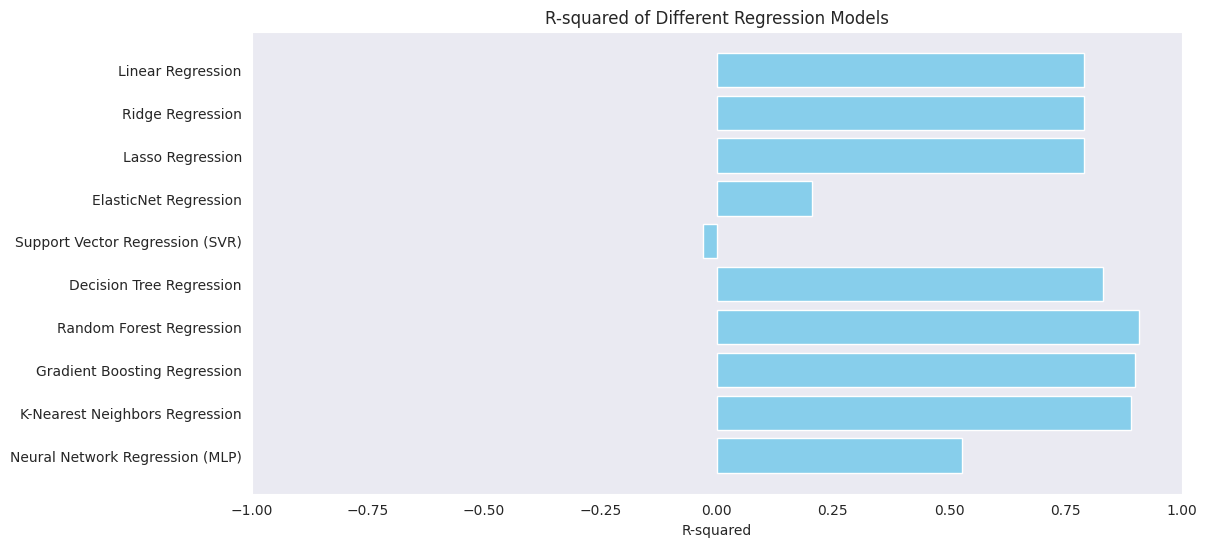

In [ ]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [ ]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 33812165.01657484
Loaded Random Forest Regression - R-squared: 0.9104876729818395
